In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load training data
feature_data = pd.read_csv('features.csv')
feature_data = feature_data.drop(['Id'], axis=1)
feature_data.head()

,gabor_mean,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,haralick_8,...,hog_41,hog_99,hog_35,hog_50,hog_36,hog_92,hog_159,hog_91,hog_19,Pawpularity
0,41.231567,0.000157,1278.492804,0.690157,2060.880358,0.062406,298.598931,6965.028630,8.182493,12.945641,...,0.362625,0.575396,0.420587,0.379427,0.420587,0.405042,0.353553,0.405042,0.444700,0.63
1,23.987915,0.000773,457.965407,0.925960,3091.327100,0.281047,191.414256,11907.342991,8.376357,11.642238,...,0.003871,0.646181,0.442801,0.018553,0.504451,0.438661,0.180718,0.438661,0.444163,0.42
2,24.436279,0.000233,724.338070,0.891415,3337.386293,0.116865,233.633501,12625.207100,8.503799,12.622846,...,0.389322,0.367500,0.399074,0.369881,0.399074,0.423174,0.022597,0.423174,0.369777,0.28
3,26.991699,0.000493,598.241637,0.880039,2493.181218,0.201182,313.177373,9374.483237,8.374829,11.921290,...,0.065807,0.494234,0.567074,0.487807,0.567074,0.463635,0.133649,0.463635,0.642630,0.15
4,39.300049,0.000133,1450.048193,0.750709,2908.689995,0.067109,258.257568,10184.711786,8.591187,13.147210,...,0.395178,0.385403,0.463285,0.353553,0.463285,0.560099,0.210328,0.560099,0.358980,0.72


In [49]:
y = feature_data['Pawpularity']
x = feature_data.iloc[:, :-1]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#Without outliers
#filtered_data = x_train[y_train != 1]
#filtered_data.head()
#x_train=filtered_data
#y_train=y_train[y_train != 1]


In [33]:
# Ridge Regression

# Define the alpha values to test
alphas = [0.01, 0.1, 1, 10, 100, 1000]

# Define the number of features to select
num_features_range = [8, 18, 28, 35, 43] 

# Store the results
results = {'alpha': [], 'num_features': [], 'mse': [], 'r2': [], 'features_selected': [], 'coefficients': []}

# Loop to iterate over alpha values and number of features
for alpha in alphas:
    for num_features in num_features_range:
        # Perform Recursive Feature Elimination (RFE)
        rfe = RFE(Ridge(alpha=alpha), n_features_to_select=num_features)
        x_rfe = rfe.fit_transform(x_train, y_train)
        
        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_rfe, y_train)

        # Make predictions on the val set
        x_val_rfe = rfe.transform(x_val)
        y_pred = ridge_model.predict(x_val_rfe)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        # Store results in the dictionary
        results['alpha'].append(alpha)
        results['num_features'].append(num_features)
        results['mse'].append(rmse)
        results['r2'].append(r2)
        results['features_selected'].append(list(x.columns[rfe.support_]))
        results['coefficients'].append(ridge_model.coef_)

        # Print results for each combination of features
        print(f"\nAlpha: {alpha}, Num Features: {num_features}")
        print(f"Features Selected: {list(x.columns[rfe.support_])}")
        print(f"MSE: {rmse}")
        print(f"R^2: {r2}")        

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.41263e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 8
Features Selected: ['haralick_4', 'haralick_9', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90', 'hog_41', 'hog_91']
MSE: 0.21401399400178725
R^2: -0.00989828311738794


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.41263e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 18
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
MSE: 0.21437258202066212
R^2: -0.01328535893299021

Alpha: 0.01, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_95', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.21403482749150063
R^2: -0.010094912591649408


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.41263e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.41263e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 35
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.21412661348698714
R^2: -0.010961429947277557

Alpha: 0.01, Num Features: 43
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', '

/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.41263e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.41263e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.40465e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 8
Features Selected: ['haralick_4', 'haralick_11', 'haralick_12', 'hog_27', 'hog_90', 'hog_41', 'hog_92', 'hog_91']
MSE: 0.21404140442138087
R^2: -0.010156990577362413


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.40465e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 18
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
MSE: 0.2142194894928977
R^2: -0.011838615843773548

Alpha: 0.1, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_95', 'hog_49', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.21399630385245272
R^2: -0.009731335968311772


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.40465e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.40465e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 35
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.2140806439654564
R^2: -0.010527402397700003

Alpha: 0.1, Num Features: 43
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog

/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.40465e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.40465e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 1, Num Features: 8
Features Selected: ['haralick_0', 'haralick_4', 'haralick_11', 'hog_27', 'hog_96', 'hog_90', 'hog_41', 'hog_50']
MSE: 0.21404240931712157
R^2: -0.010166475703316635

Alpha: 1, Num Features: 18
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_27', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_90', 'hog_41', 'hog_99', 'hog_50', 'hog_92', 'hog_91']
MSE: 0.21412030056061693
R^2: -0.010901820066124612

Alpha: 1, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.21390214370291974
R^2: -0.008842951125607401

Alpha: 1, Num Features: 35
Features Selected: ['gabor_mean', 'haralick_0', 'har

In [34]:
# Find the combination with the minimum MSE
best_combination = results_df.loc[results_df['mse'].idxmin()]

print("\nBest Combination:")
print(best_combination)

# Print the selected features for the best combination
selected_features = best_combination['features_selected']
print("\nSelected Features for the Best Combination:")
print(selected_features)


Best Combination:
alpha                                                            100.0
num_features                                                        28
mse                                                           0.213588
r2                                                           -0.005877
features_selected    [haralick_0, haralick_2, haralick_4, haralick_...
coefficients         [0.0020093288032560926, -0.009680961024241087,...
Name: 22, dtype: object

Selected Features for the Best Combination:
['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']


Selected Features: Index(['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8',
       'haralick_10', 'haralick_11', 'lbp_mean', 'hog_95', 'hog_49', 'hog_27',
       'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100',
       'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92',
       'hog_159', 'hog_91', 'hog_19'],
      dtype='object')
Coefficients: [ 0.00200933 -0.00968096  0.00357423  0.01009723  0.00553679 -0.01620697
 -0.00415926 -0.00622566 -0.00750492 -0.01956082  0.01425615 -0.00783356
 -0.01289405  0.00172404 -0.01542468 -0.01426929 -0.00892282  0.00475287
  0.01415991 -0.02441313  0.00350567  0.00870267 -0.01856587  0.00148346
  0.00178508 -0.00877515  0.00613455  0.00836182]
Root Mean squared error: 0.21359
Coefficient of determination: -0.00588


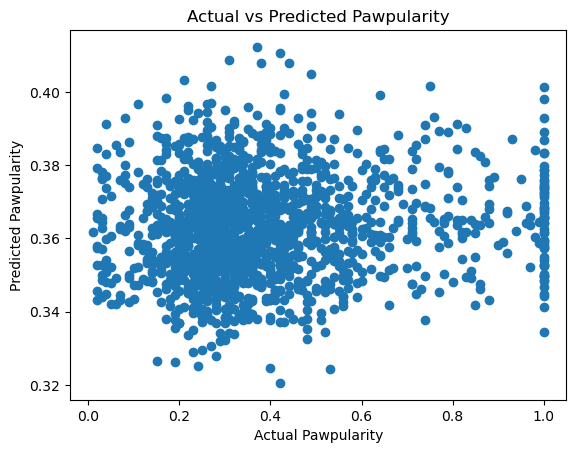

In [35]:
# Define the alpha value and number of features
alpha = 100

# Fit Ridge Regression model
ridge_model = Ridge(alpha=alpha)
rfe=RFE(ridge_model,n_features_to_select=28)
x_rfe=rfe.fit_transform(x_train,y_train)

#get the selected features
selected_feature = x.columns[rfe.support_]
ridge_model.fit(x_train[selected_feature], y_train)

# Make predictions
y_pred = ridge_model.predict(x_val[selected_feature])

# Display the metrics of the best model
print(f"Selected Features: {selected_feature}")
print(f"Coefficients: {ridge_model.coef_}")
print('Root Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()

In [36]:
x_test_selected = x_test[selected_feature]

# Predictions in testing set
y_test_pred = ridge_model.predict(x_test_selected)

# Metrics
print('Root Mean squared error on test set: %.5f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of determination on test set: %.5f' % r2_score(y_test, y_test_pred))

Root Mean squared error on test set: 0.21020
Coefficient of determination on test set: 0.00047


In [59]:
# Random Forest

# Define the parameter grid
param_grid = {
    'n_estimators': [50], # values tested were 20, 30, 50, 80
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [4, 6, 8, 10],
    'min_samples_leaf': [4, 6, 8, 10]
}

# Perform grid search on Random Forest
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose=3)
grid.fit(x_train, y_train)

# Get the best parameters
best_aparams = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.010 total time=   4.6s
[CV 2/5] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.004 total time=   3.9s
[CV 3/5] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=-0.005 total time=   3.7s
[CV 4/5] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.013 total time=   3.7s
[CV 5/5] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50;, score=0.013 total time=   3.7s
[CV 1/5] END max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50;, score=0.009 total time=   3.7s
[CV 2/5] END max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50;, score=0.002 total time=   3.7s
[CV 3/5] END max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50;, score=-0.005 total time=   3.7s
[CV 4/5]

In [60]:
best_aparams, best_estimator

({'max_depth': 4,
  'min_samples_leaf': 10,
  'min_samples_split': 8,
  'n_estimators': 50},
 RandomForestRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=8,
                       n_estimators=50))

In [61]:
# Make predictions with the best estimator
y_pred = best_estimator.predict(x_val)

# Get the model performance metrics
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.21225
Coefficient of determination: 0.00665


In [62]:
# Predictions with the best estimator
y_test_pred = best_estimator.predict(x_test)

# Metrics
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_test, y_test_pred))

Mean squared error: 0.20936
Coefficient of determination: 0.00837
